
Datos:
x = [8.0, 4.0, 12.0, 3.0, 10.0]
y = [5.0, 2.0, 14.0, 6.0, 5.0]

Matriz de distancia: 
[0.0, 7.0, 13.0, 6.0, 2.0]
[7.0, 0.0, 20.0, 5.0, 9.0]
[13.0, 20.0, 0.0, 17.0, 11.0]
[6.0, 5.0, 17.0, 0.0, 8.0]
[2.0, 9.0, 11.0, 8.0, 0.0]
El número menor es: 2.0

Iteracion: 1

Datos actualizados
[10.0, 4.0, 12.0, 3.0]
[5.0, 2.0, 14.0, 6.0]

Matriz de distancia: 
[0.0, 9.0, 11.0, 8.0]
[9.0, 0.0, 20.0, 5.0]
[11.0, 20.0, 0.0, 17.0]
[8.0, 5.0, 17.0, 0.0]
El número menor es: 5.0

Iteracion: 2

Datos actualizados
[10.0, 3.0, 12.0]
[5.0, 6.0, 14.0]

Matriz de distancia: 
[0.0, 8.0, 11.0]
[8.0, 0.0, 17.0]
[11.0, 17.0, 0.0]
El número menor es: 8.0

Iteracion: 3

Datos actualizados
[3.0, 12.0]
[6.0, 14.0]

Matriz de distancia: 
[0.0, 17.0]
[17.0, 0.0]
El número menor es: 17.0

La grafica es: 


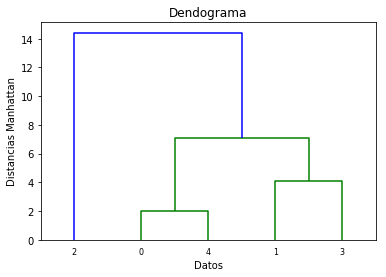

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as m
import scipy.cluster.hierarchy as graficar
datos = pd.read_csv("datos3.csv", header=None, skiprows=1, sep=';')
distancia = []


def guardar_datos():
  x = []
  y = []
  for i in range(len(datos[0])):
    x.append(float(datos[0][i]))
  for i in range(len(datos[1])):
    y.append(float(datos[1][i]))
  print("\nDatos:")
  print("x = " + str(x))
  print("y = " + str(y))
  return x,y
    
def manhattan(x,y):
  dist = []
  for i in range(len(x)):
    dist.append([])
    for j in range(len(y)):
      dist[i].append(abs(x[j] - x[i]) + abs(y[j] -y[i]))   
  print("\nMatriz de distancia: ")
  for i in dist:
      print(i)
  distancia = dist
  return dist

def euclidiana(x,y):
  dist = []
  for i in range(len(x)):
    dist.append([])
    for j in range(len(y)):
      dist[i].append(m.sqrt(((x[j] - x[i])**2)+(y[j] -y[i])**2))   
  print("\nMatriz de distancia: ")
  for i in dist:
      print(i)
  distancia = dist
  return dist

def menor(x):
  menor=1000
  fila=0
  columna=0
  for i in range(0,len(x)):
    for j in range(0,i):
      if(i!=j):
        if (x[i][j]<menor):
          menor=x[i][j]
          fila=i
          columna=j
  print("El número menor es: "+str(menor))
  return fila,columna      

def cluster(x,y,itera):
  bandera=1
  distancia = manhattan(x,y)
  fila , columna = menor(distancia)
  n_x=[]
  n_y=[]
  c1=(x[fila]+x[fila])/2
  c2=(y[fila]+y[fila])/2
  for i in range(len(x)):
    if((i == fila or i == columna)and bandera==1):
      n_x.append(c1)
      n_y.append(c2)
      bandera=0
    elif(i!=fila and i!=columna):
      n_x.append(x[i])
      n_y.append(y[i])
  
  if(len(distancia)!=2):
    print("\nIteracion: %d"%itera)
    itera= itera +1
    print("\nDatos actualizados")    
    print(n_x)
    print(n_y)
    cluster(n_x,n_y,itera)
    
def graficar_dendograma():
  print("\nLa grafica es: ")
  dendrograma = graficar.dendrogram(graficar.linkage(datos, method = "complete"),leaf_rotation=0.,  
          leaf_font_size=8.,  
          show_contracted=True)
  plt.title("Dendograma")
  plt.xlabel("Datos")
  plt.ylabel("Distancias Manhattan")
  plt.show()
  
x, y = guardar_datos()
cluster(x,y,1)
graficar_dendograma()  


LOS DATOS SON IGUALES POR ESO GENERA EL ERROR

In [0]:
import pandas as pd
import numpy as np
import random
import math as m

def dist_euclidiana(matriz,centroid):
  temp=0
  for i in range(len(matriz)):
    temp+=(matriz[i]-centroid[i])**2
  dist=m.sqrt(temp)
  return dist

def num_menor(matriz):
  matriz2=np.zeros((len(matriz),len(matriz[0])))
  for i in range(len(matriz[0])):
    temp=100
    for j in range(len(matriz)):
      aux=matriz[j][i]
      if(aux<temp):
        temp=aux
    for j in range(len(matriz)):
      if(temp==matriz[j][i]):
        matriz2[j][i]=1
        break
  return matriz2
def sumar(auxi,cont):
  nuevo=[]
  nume1=0
  nume2=0
  for i in range(len(auxi)):
    for j in range(len(auxi[0])):
      if(j==0):
        nume1+=auxi[i][j]
      else:
        nume2+=auxi[i][j]
  nume1=nume1/cont
  nume2=nume2/cont
  nuevo.append(nume1)
  nuevo.append(nume2)
  return nuevo
def comparar(c1,c2):
  flag=True
  for i in range(len(c1)):
    for j in range(len(c1[0])):
      if(c1[i][j]!=c2[i][j]):
        flag=False
  return flag

#**************************MAIN***********************************
datos=pd.read_csv('3D2.txt',sep=',')
matriz=np.array(datos)
k=int(input("Digite el valor de k: "))
D=np.zeros((k,len(matriz)))
centroides=np.zeros((k,len(matriz[0])))

for i in range(len(centroides)):
  for j in range(len(centroides[0])):
    centroides[i,j]=random.randint(1,1000)
print("Datos:\n"+str(matriz)+"\nCentroides:\n"+str(centroides))

for i in range(len(centroides)):
  for j in range(len(matriz)):
    aux=dist_euclidiana(matriz[j],centroides[i])
    D[i,j]=aux
    
print("\nD0="+str(D))
nuevo=num_menor(D)
print(nuevo)
centroides2=[]
for i in range(len(nuevo)):
  cont=0
  auxi=[]
  for j in range(len(nuevo[0])):
    if(nuevo[i,j]==1):
      cont+=1
    if(nuevo[i,j]==1):
      auxi.append(matriz[j])
  if(cont!=0):
    temp=sumar(auxi,cont)
    centroides2.append(temp)
  else:
    centroides2.append([0,0])
print("Nuevos centroides: ")
for elem in centroides2:
  print(elem)
D=np.zeros((k,len(matriz)))  
for i in range(len(centroides2)):
  for j in range(len(matriz)):
    aux=dist_euclidiana(matriz[j],centroides2[i])
    D[i,j]=aux
  
print("\nD1="+str(D))
nuevo2=num_menor(D)
print("ANTERIOR MATRIZ \n",nuevo)
print("NUEVA MATRIZ \n",nuevo2)
iterador=2
while(comparar(nuevo,nuevo2)!=True):
  centroides2=[]
  D=np.zeros((k,len(matriz)))
  for i in range(len(nuevo)):
    cont=0
    auxi=[]
    for j in range(len(nuevo[0])):
      if(nuevo[i,j]==1):
        cont+=1
      if(nuevo[i,j]==1):
        auxi.append(matriz[j])
    if(cont!=0):
      temp=sumar(auxi,cont)
      centroides2.append(temp)
    else:
      centroides2.append([0,0])
  print("Nuevos centroides: ")
  for elem in centroides2:
    print(elem)
    
  for i in range(len(centroides2)):
    for j in range(len(matriz)):
      aux=dist_euclidiana(matriz[j],centroides2[i])
      D[i,j]=aux
    
  print("\nD"+str(iterador)+"="+str(D))
  nuevo=nuevo2
  nuevo2=num_menor(D)
  print("ANTERIOR MATRIZ \n",nuevo)
  print("NUEVA MATRIZ \n",nuevo2)
  iterador+=1
print("Los centroides ya no cambian, por tanto los centroides son:\n")
for i in centroides2:
  print(i)

Digite el valor de k: 5
Datos:
[[1.44552912e+08 9.35018840e+00 5.67406785e+01 1.76148402e+01]
 [1.44552912e+08 9.35054850e+00 5.67405445e+01 1.80835356e+01]
 [1.44552912e+08 9.35080580e+00 5.67404845e+01 1.82794653e+01]
 [1.44552912e+08 9.35105340e+00 5.67404863e+01 1.84229736e+01]
 [1.44552912e+08 9.35147470e+00 5.67405022e+01 1.91248886e+01]
 [1.44552912e+08 9.35212730e+00 5.67405585e+01 1.95905927e+01]
 [1.44552912e+08 9.35242010e+00 5.67405974e+01 1.96217637e+01]
 [1.44552912e+08 9.35258390e+00 5.67406290e+01 1.96599309e+01]
 [1.44552912e+08 9.35272550e+00 5.67406626e+01 1.94906696e+01]
 [1.44552912e+08 9.35307590e+00 5.67408002e+01 1.92302682e+01]
 [1.44552912e+08 9.35340400e+00 5.67409042e+01 1.82332802e+01]
 [1.44552912e+08 9.35372870e+00 5.67409995e+01 1.76008424e+01]
 [1.44552912e+08 9.35417900e+00 5.67410594e+01 1.76443794e+01]
 [1.44552912e+08 9.35458100e+00 5.67411511e+01 1.83974825e+01]
 [1.44552912e+08 9.35478680e+00 5.67412058e+01 1.88645551e+01]
 [1.44552912e+08 9.35511

IndexError: ignored